<a href="https://colab.research.google.com/github/nelslindahlx/KnowledgeReduce/blob/main/CivicHonors2KGwTest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Code Overview

The provided code is designed to create a knowledge graph from the text content of a webpage, specifically "https://civichonors.com/". Here's a summary of each step and its purpose:

1. **Installing Libraries**: The code begins by installing necessary Python libraries including `requests` for fetching web content, `beautifulsoup4` for HTML parsing, `networkx` for creating and managing the knowledge graph, `nltk` for natural language processing tasks, and `matplotlib` for visualization.

2. **Importing Libraries**: After installation, the script imports these libraries to utilize their functionalities. The `nltk` library also downloads additional resources for tokenizing and tagging text.

3. **Scraping Webpage Content**: The `scrape_webpage` function takes a URL and uses `requests` to retrieve its content. `BeautifulSoup` then parses this content, extracting text from paragraph tags (`<p>`). The resulting text is a concatenation of all paragraph texts from the webpage.

4. **Creating a Knowledge Graph**: In `create_knowledge_graph`, the text is first split into sentences using `nltk.sent_tokenize`. Each sentence is further tokenized into words, and part-of-speech tagging is applied to identify proper nouns (NNP). These nouns are treated as entities. The function then creates a directed graph using `networkx` and adds edges between consecutive entities within each sentence, implying a relationship.

5. **Saving the Graph**: The `save_graph` function saves the created graph in both GEXF and GraphML formats, making it portable and usable in various graph analysis tools.

6. **Executing the Process**: This part of the code orchestrates the entire process - scraping the webpage, creating the knowledge graph from its content, and saving the graph to the specified file paths.

7. **Testing the Knowledge Graphs**: The `visualize_graph` function visualizes a part of the created graph. It uses `matplotlib` to draw a subset of the graph's nodes and edges, helping to verify and understand the structure and relationships within the graph.

8. **Downloading Created Files**: The final step involves using Google Colab's file explorer feature to download the generated `.gexf` and `.graphml` files for further analysis or use.

Overall, this code automates the extraction of information from a webpage and organizes it into a structured, visualizable knowledge graph, demonstrating a fundamental application of web scraping, NLP, and graph theory in Python.

# Step 1: Install Required Libraries

In [ ]:
!pip install requests beautifulsoup4 networkx nltk matplotlib

# Step 2: Import Libraries

In [ ]:
import requests
from bs4 import BeautifulSoup
import networkx as nx
import re
import nltk
import matplotlib.pyplot as plt
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.tag import pos_tag
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

# Step 3: Define the Web Scraping Function

In [ ]:
def scrape_webpage(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    text = ' '.join([p.get_text() for p in soup.find_all('p')])
    return text

# Step 4: Enhance the Knowledge Graph Creation Function

In [ ]:
def create_knowledge_graph(text):
    sentences = sent_tokenize(text)
    graph = nx.DiGraph()
    for sentence in sentences:
        tokens = word_tokenize(sentence)
        tagged = pos_tag(tokens)
        entities = [word for word, pos in tagged if pos == 'NNP']
        for i in range(len(entities) - 1):
            graph.add_edge(entities[i], entities[i + 1], relation='related_to')
    return graph

# Step 5: Define the Graph Saving Function

In [ ]:
def save_graph(graph, gexf_path, graphml_path):
    nx.write_gexf(graph, gexf_path)
    nx.write_graphml(graph, graphml_path)

# Step 6: Execute the Entire Process

In [ ]:
url = "https://civichonors.com/"
webpage_text = scrape_webpage(url)
knowledge_graph = create_knowledge_graph(webpage_text)
gexf_path = "/content/knowledge_graph.gexf"
graphml_path = "/content/knowledge_graph.graphml"
save_graph(knowledge_graph, gexf_path, graphml_path)

# Step 7: Test the Knowledge Graphs

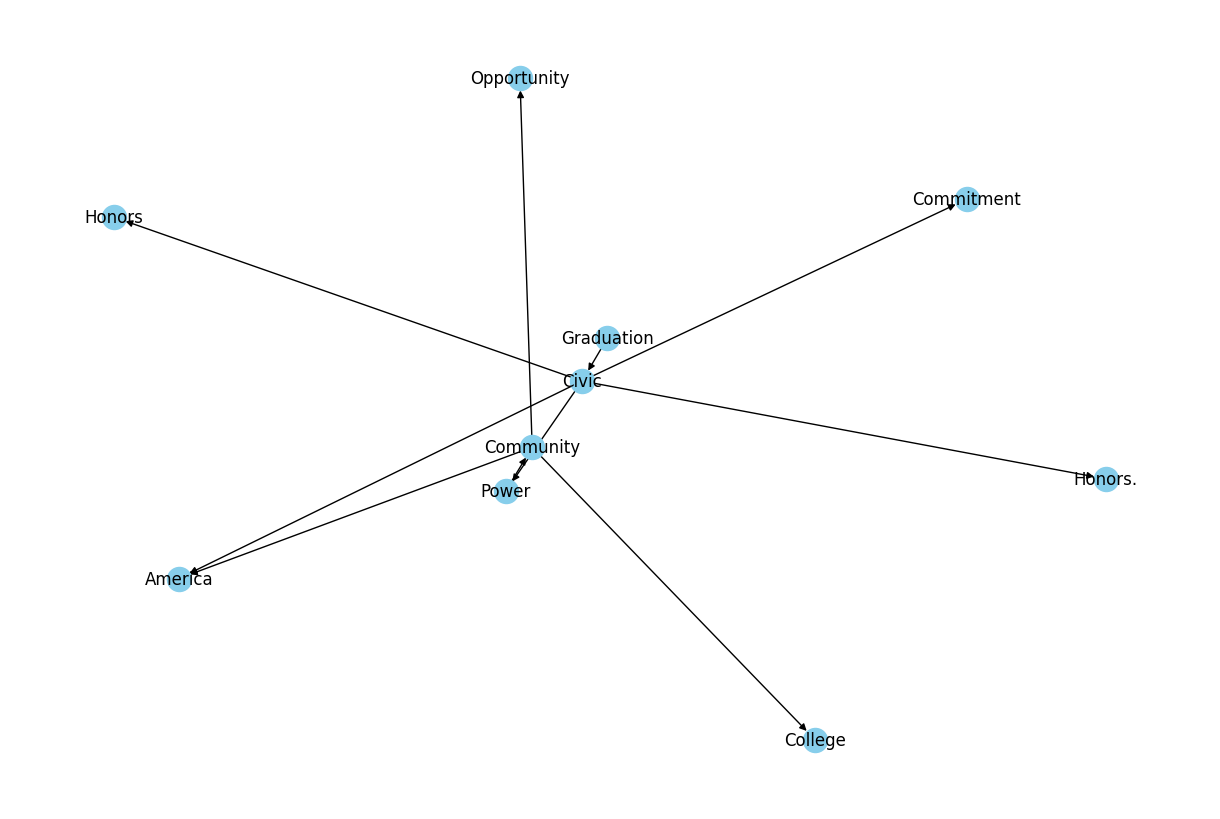

In [ ]:
def visualize_graph(graph, limit=10):
    plt.figure(figsize=(12, 8))
    # Draw only a subset of nodes for simplicity
    subgraph = nx.DiGraph(list(graph.edges())[:limit])
    pos = nx.spring_layout(subgraph)
    nx.draw(subgraph, pos, with_labels=True, node_color='skyblue', edge_color='black')
    plt.show()

# Visualize a portion of the knowledge graph
visualize_graph(knowledge_graph)